In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import datetime
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import classification_report

In [5]:
import csv

In [6]:
d = {}
with open("./train.txt", 'r') as f:
    reader = csv.reader(f, delimiter="\t")
    
    for line in reader:
        entry = list(map(int, line))
        d[entry[0]] = entry[1:]

In [8]:
df = pd.read_csv('./finaldata/train_60k.csv')

In [18]:
X.head()

,SourceInDegree,Jaccard,ResourceAlloc,PrefAttach
0,19,0.013393,0.211661,86870
1,189,0.022556,0.105732,16863
2,11,0.027778,0.000972,132
3,11,0.000000,0.000000,33
4,11,0.000000,0.000000,33


In [30]:
X = df.drop(['Connected', 'Source', 'Sink', 'SinkInDegree', 'SinkOutDegree', 'ShortestPath', 'SourceOutDegree', 'AdamicAdar', 'N2V_dotprod', 'CommonNeighbors'], axis = 1)
y = df['Connected']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

In [12]:
def generate_submission(predictions):
    id_list = [x for x in range(1,2001)]
    pred_list = [x for x in predictions[:,1]]
    pred = pd.DataFrame(list(zip(id_list, pred_list)), columns=['Id','Predictions'])
    pred.to_csv(f'./submissions/submit_{datetime.datetime.now()}.csv', index=False)

In [13]:
test = pd.read_csv('./finaldata/test_2k.csv')

In [19]:
label_predictors = test.drop(['Source', 'Sink', 'SinkInDegree', 'ShortestPath', 'SinkOutDegree', 'SourceOutDegree', 'AdamicAdar', 'N2V_dotprod', 'CommonNeighbors'], axis = 1)

In [28]:
label_predictors.head()

,SourceInDegree,Jaccard,ResourceAlloc,PrefAttach
0,102,0.000000,0.000000,435
1,39,0.006260,0.000740,102306
2,13,0.000000,0.000000,418
3,16,0.062500,0.032617,2838
4,30,0.012072,0.006229,62196


In [21]:
from xgboost import XGBClassifier, XGBRegressor

In [39]:
model = XGBClassifier(n_estimators=10, learning_rate=0.5)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [40]:
validations = model.predict(X_test)

In [41]:
print(classification_report(y_test, validations))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     14831
           1       0.83      0.79      0.81     15067

    accuracy                           0.81     29898
   macro avg       0.82      0.81      0.81     29898
weighted avg       0.82      0.81      0.81     29898



In [42]:
X_train.head()

,SourceInDegree,Jaccard,ResourceAlloc,PrefAttach
32565,207,0.009713,0.010636,1139902
33653,22,0.000000,0.000000,15725
52198,69,0.000000,0.000000,20265
7479,4637,0.000046,0.001599,437580
47047,17,0.000000,0.000000,119394


In [43]:
predictions = model.predict_proba(label_predictors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5cec39b0>]],
      dtype=object)

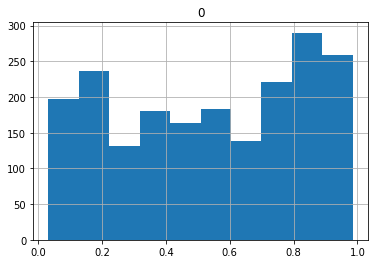

In [44]:
pred_list = [x for x in predictions[:,1]]
pd.DataFrame(pred_list).hist()

In [38]:
generate_submission(predictions)

In [45]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression(solver='liblinear', C=0.01)

In [50]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
validations = lr.predict(X_test)

In [52]:
print(classification_report(y_test, validations))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14831
           1       0.50      1.00      0.67     15067

    accuracy                           0.50     29898
   macro avg       0.25      0.50      0.34     29898
weighted avg       0.25      0.50      0.34     29898



/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
